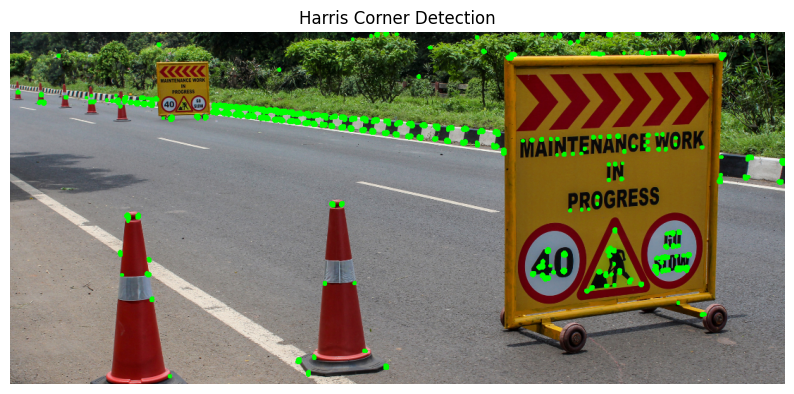

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('obstacle.png')  # Replace with your filename
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=6, ksize=15, k=0.04)

# Dilate to enhance corner points
dst = cv2.dilate(dst, None)

# Threshold for detecting corners
thresh = 0.15 * dst.max()

# Copy image for drawing
corner_image = np.copy(image)

# Draw circles where corners are detected
for j in range(dst.shape[0]):
    for i in range(dst.shape[1]):
        if dst[j, i] > thresh:
            cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 1)

# Show final corner-marked image
plt.figure(figsize=(10, 6))
plt.imshow(corner_image)
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()

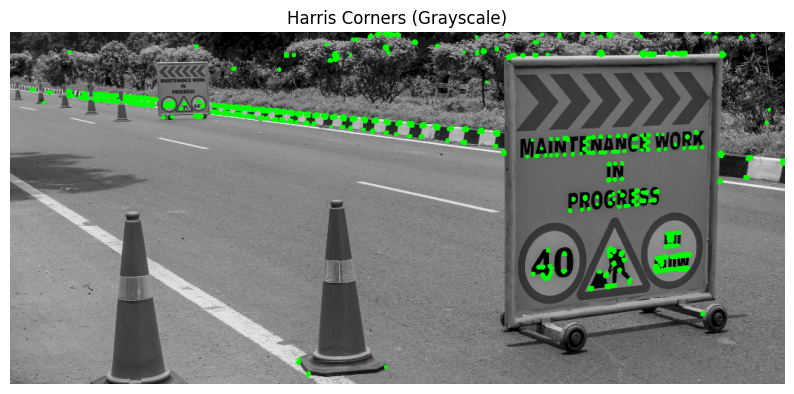

In [51]:
# Convert to float32 for Harris detector
gray = np.float32(image)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=6, ksize=5, k=0.04)

# Dilate result to mark the corners
dst = cv2.dilate(dst, None)

# Threshold to detect strong corners
thresh = 0.15 * dst.max()

# Create a copy of the grayscale image to draw on
corner_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Mark corners in green (on grayscale-looking image)
for j in range(dst.shape[0]):
    for i in range(dst.shape[1]):
        if dst[j, i] > thresh:
            cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 1)

# Display result
plt.figure(figsize=(10, 6))
plt.imshow(corner_image, cmap='gray')
plt.title("Harris Corners (Grayscale)")
plt.axis("off")
plt.show()
